<a href="https://colab.research.google.com/github/IsaacGordin/MohonkForestData/blob/main/RegenDat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The averages for the forest type are Whole Forest
The averages for the forest type are Ash Forest
The averages for the forest type are Chestnut Oak Forest (burned)
The averages for the forest type are Chestnut Oak Forest
The averages for the forest type are Hemlock Forest
The averages for the forest type are Hemlock Hardwood Forest
The averages for the forest type are Oak Hickory Forest


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


The averages for the forest type are Pitch Pine Forest


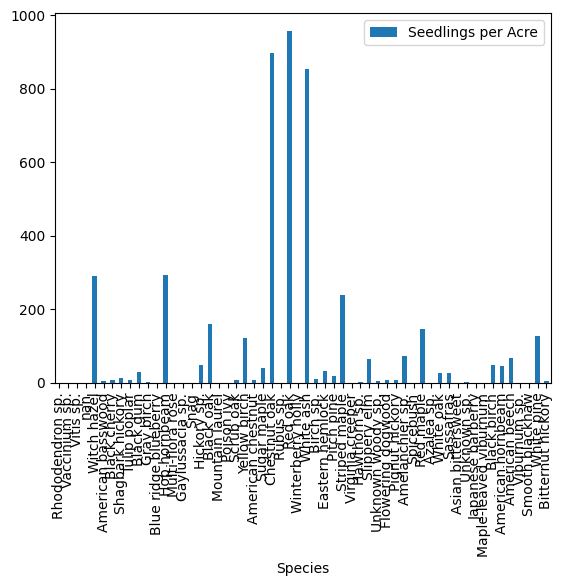

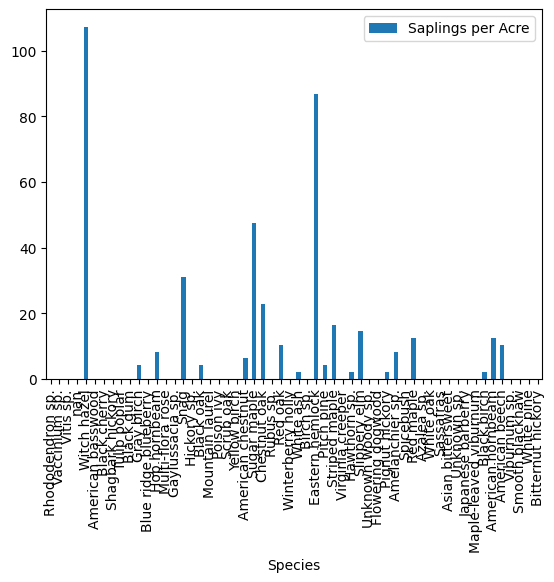

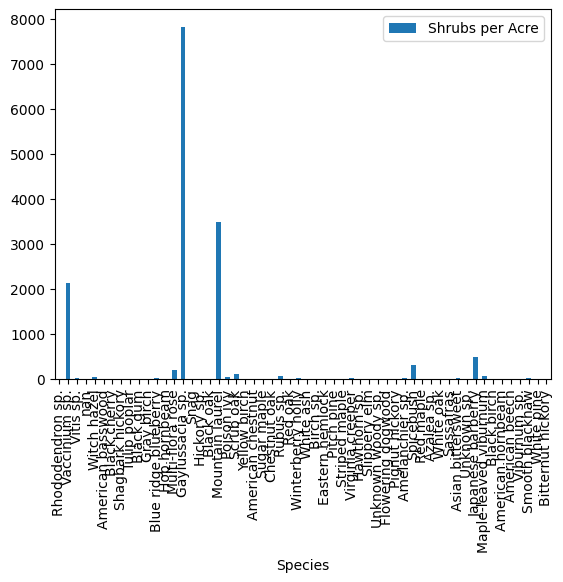

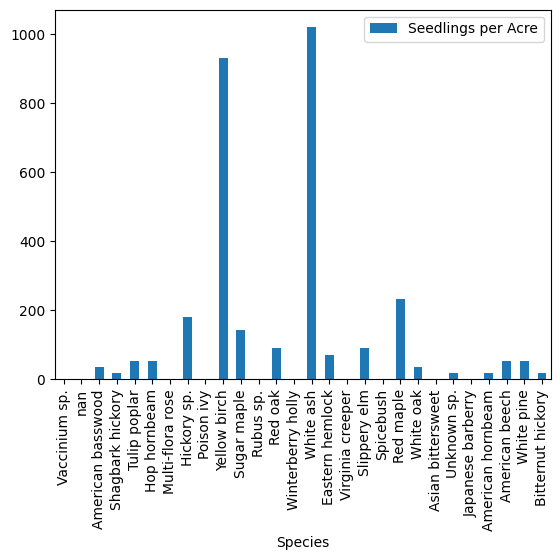

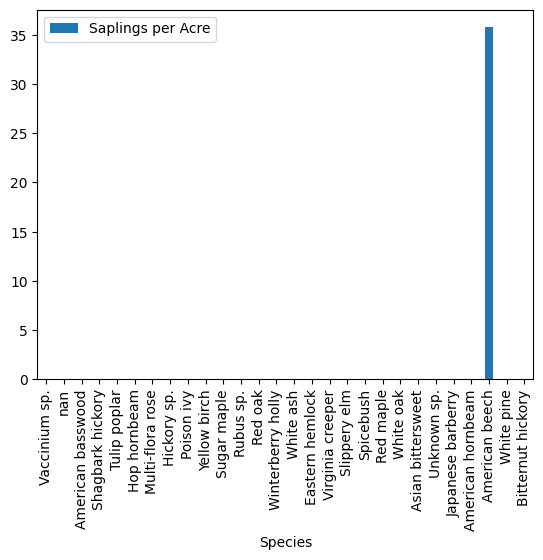

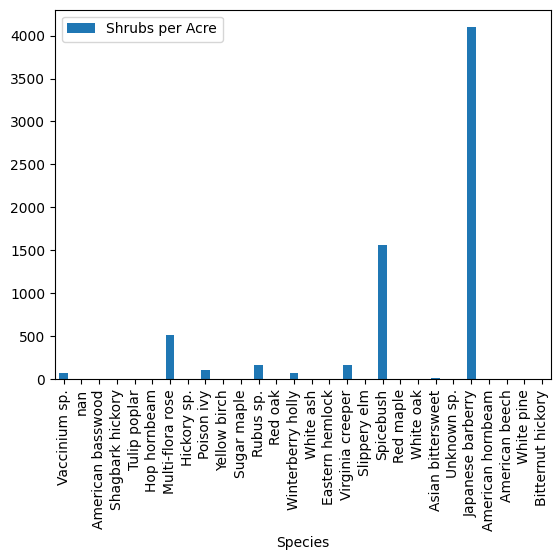

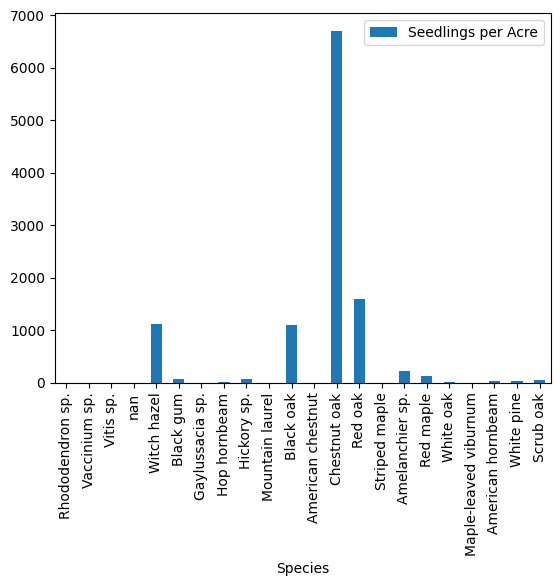

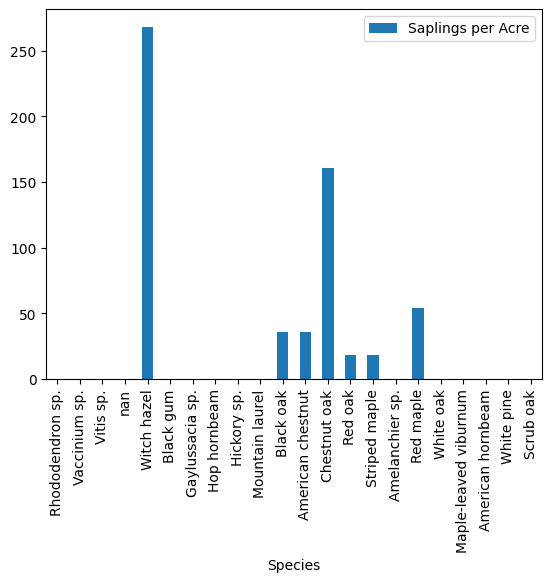

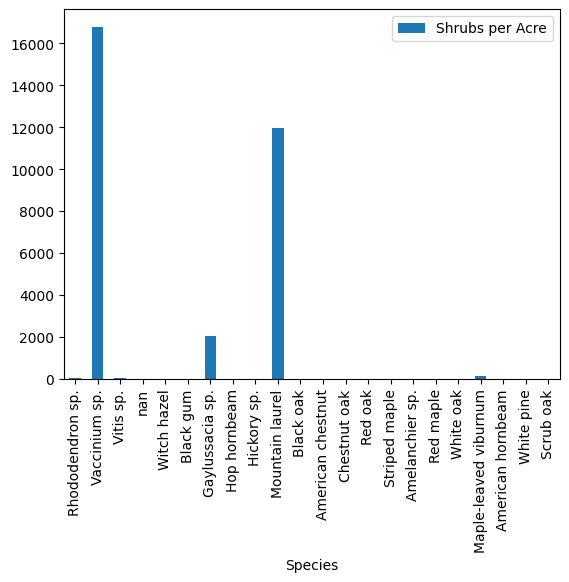

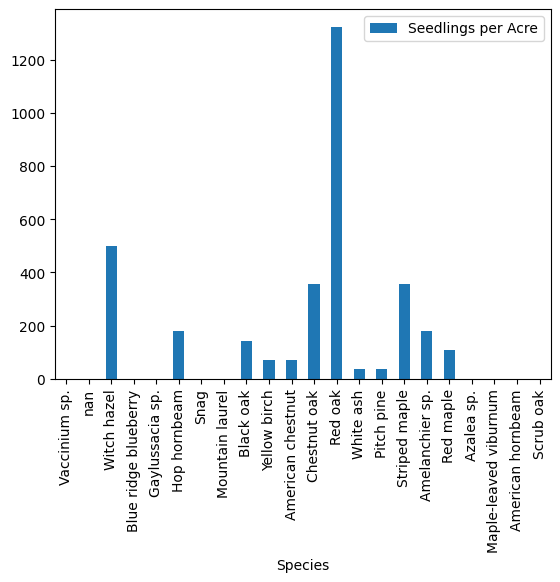

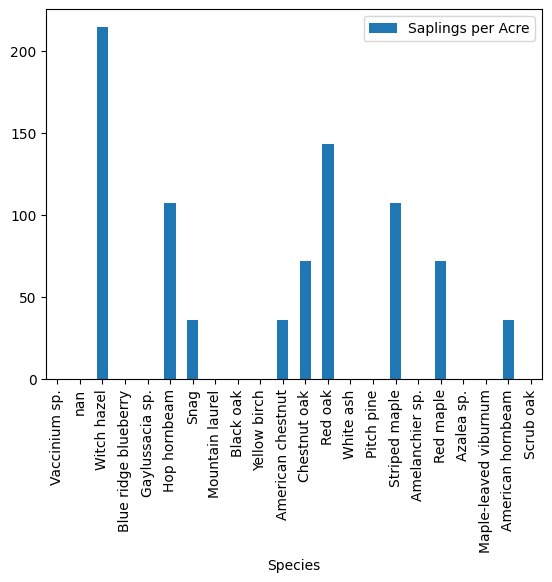

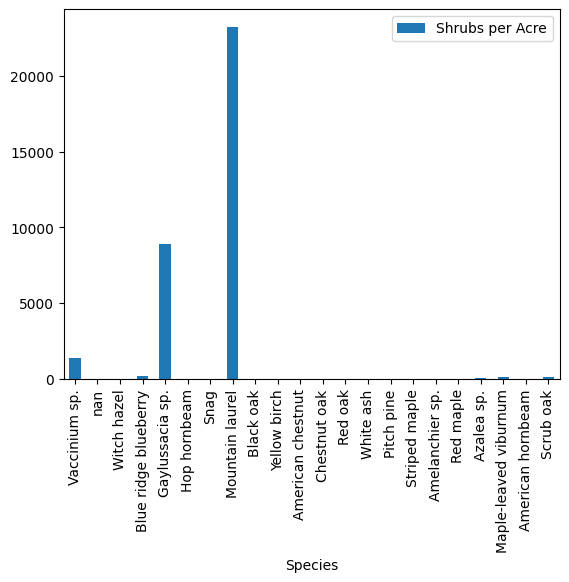

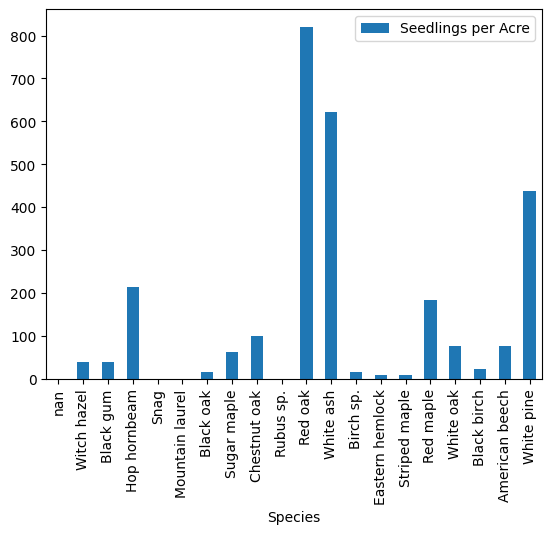

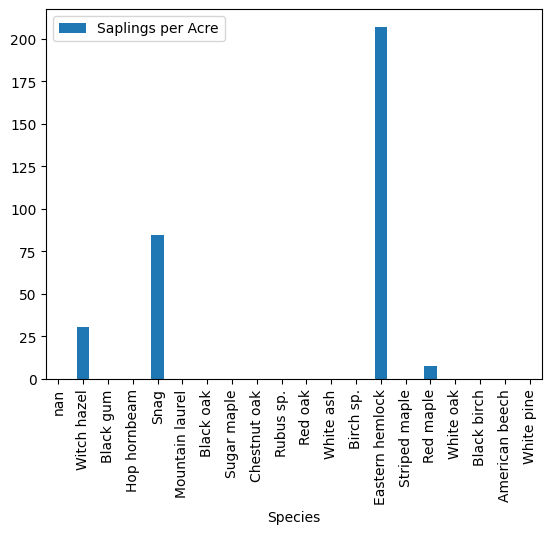

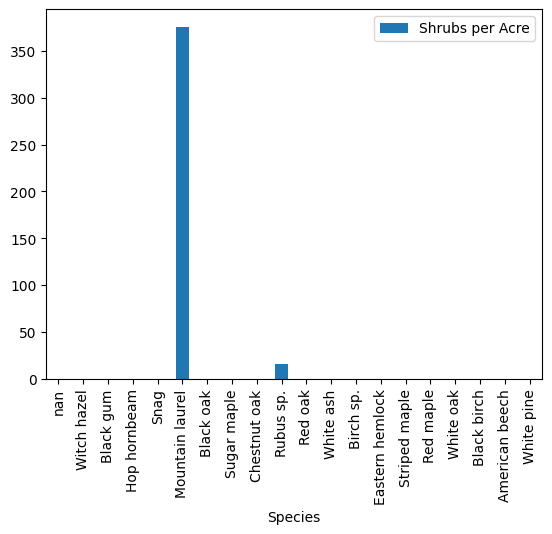

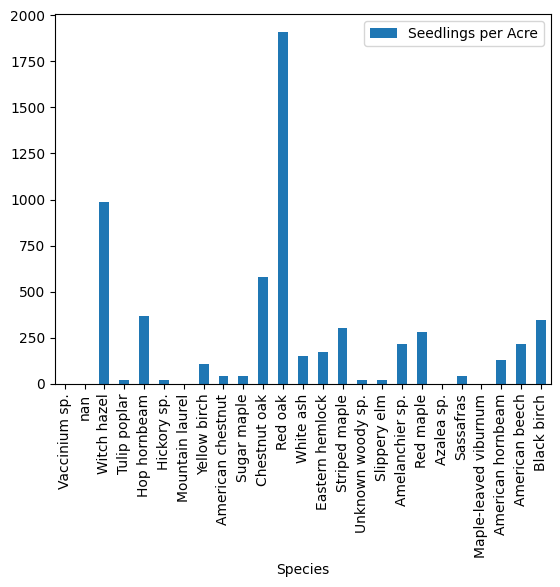

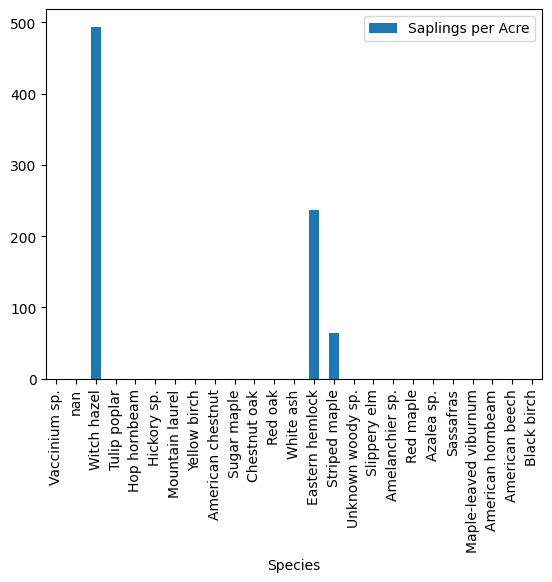

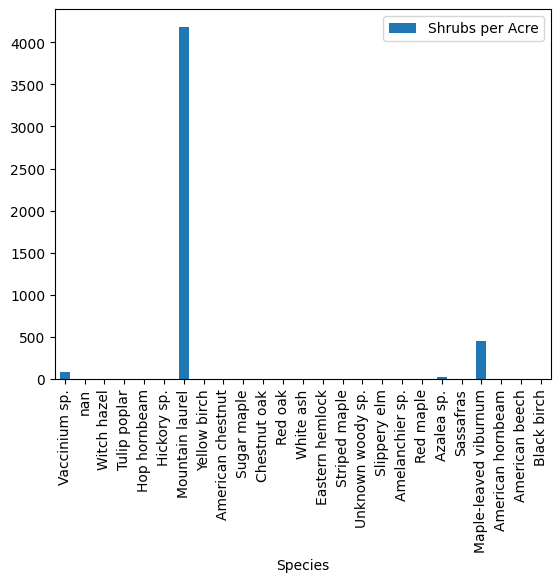

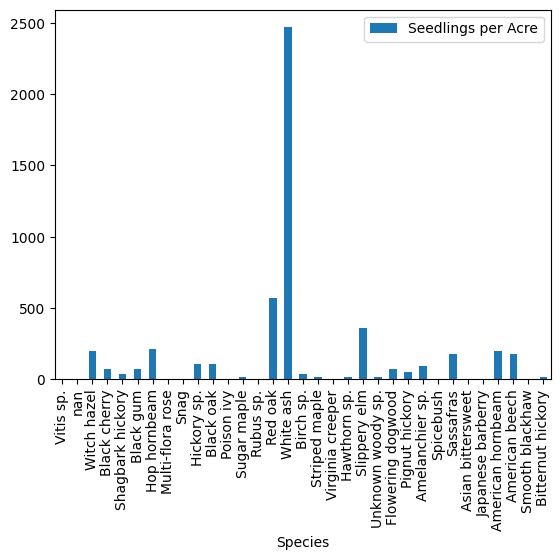

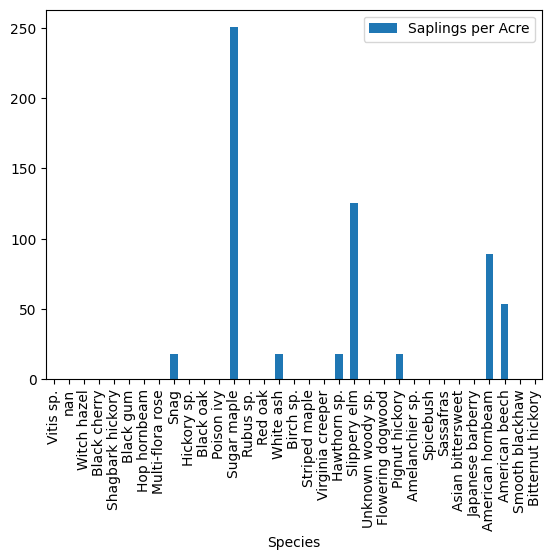

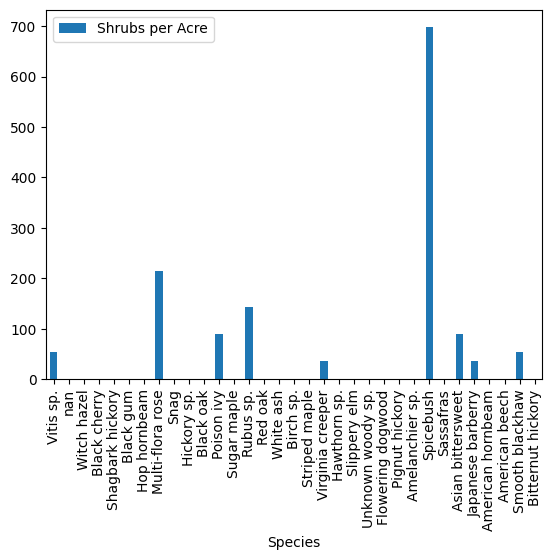

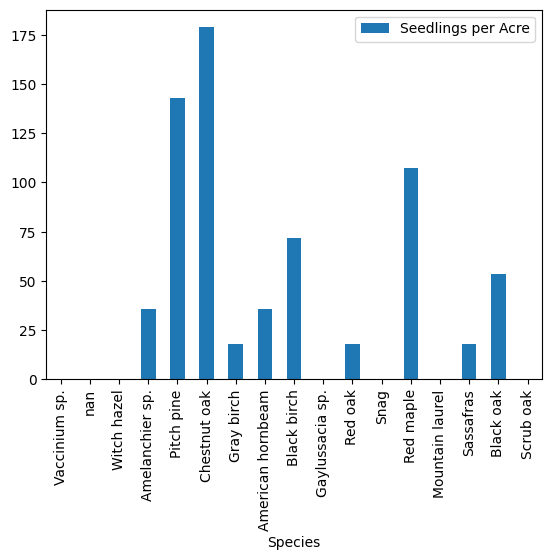

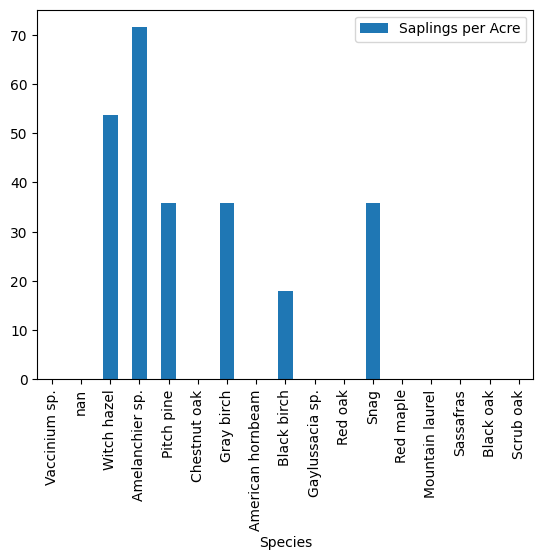

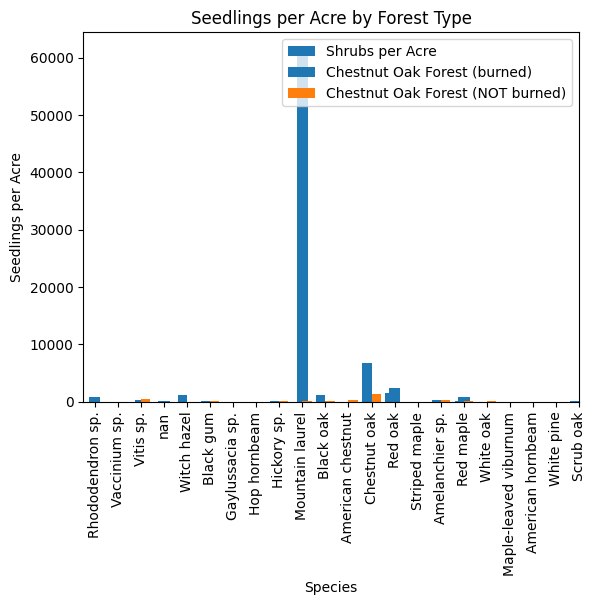

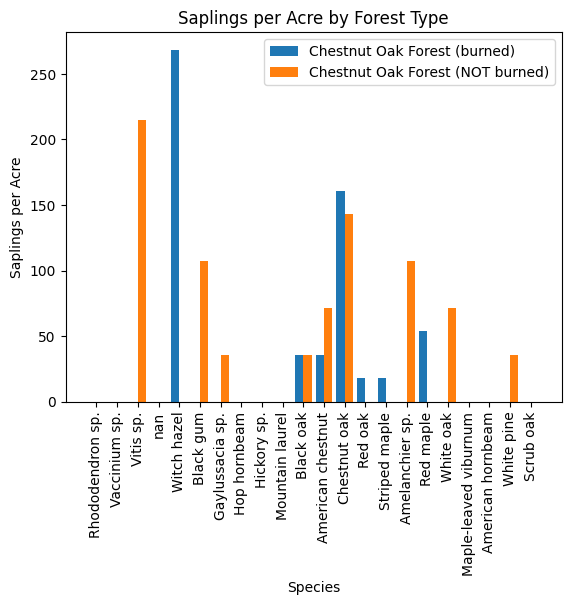

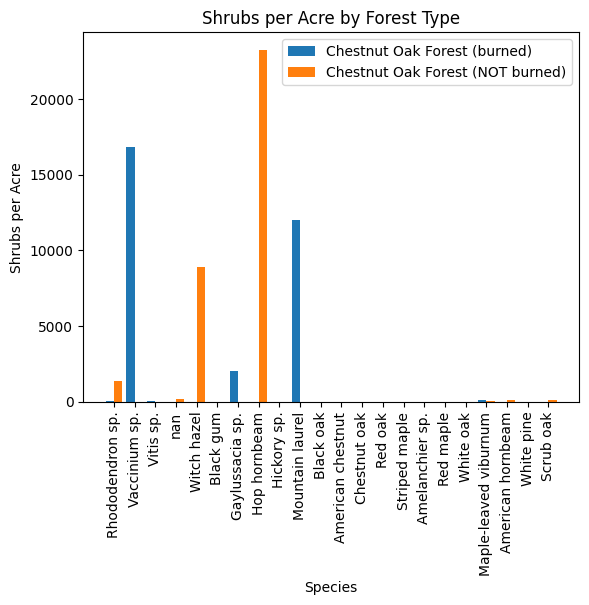

In [19]:
'''
Isaac Gordin
4/3/2024
This code will be for analyzing the tree regeneration data
'''

#Import libraries
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from collections import defaultdict
import statistics
import seaborn

#import data
url = 'https://raw.githubusercontent.com/IsaacGordin/MohonkForestData/main/RegenerationPlot.Data.csv'
regendat = pd.read_csv(url)
subplotRadiusMeters = 2
subplotAreaMetersSquared = math.pi * subplotRadiusMeters**2
subplotAreaSquareFeet = subplotAreaMetersSquared * 10.764
subplotAreaAcres = subplotAreaMetersSquared/4047

#This function will be for creating per plot generalizations
def plotAverages(df, year):
  if(year == 2018):
    df = df[df['Year'] == 2018]
  else:
    df = df[df['Year'] > 2018]
  plotCount = df['Plot'].nunique()
  plotList = list(range(1,plotCount+1)) #Create empty lists to populate with data
  saplingCount = [0]*plotCount
  seedlingCount = [0]*plotCount
  shrubCount = [0]*plotCount
  for index, row in df.iterrows():
    if(row['Category'] == 'Sapling'):
      saplingCount[row['Plot'] - 1] += row['Count']
    if(row['Category'] == 'Seedling'):
      seedlingCount[row['Plot'] - 1] += row['Count']
    if(row['Category'] == 'Shrub'):
      shrubCount[row['Plot']-1] += row['Count']

  returnTable = pd.DataFrame({'Plot': plotList, 'SeedlingCount': seedlingCount, 'SaplingCount': saplingCount, 'ShrubCount': shrubCount})
  return returnTable

def forestAverages(df, year):
  plotAvgs = plotAverages(df, year)
  plotCount = plotAvgs['Plot'].nunique()
  sapAvg = statistics.mean(plotAvgs['SaplingCount'])
  seedAvg = statistics.mean(plotAvgs['SeedlingCount'])
  shrubAvg = statistics.mean(plotAvgs['ShrubCount'])
  sapPA = sapAvg/(subplotAreaAcres*3*plotCount) #Divide by three because there are three regen plots per plot
  seedPA = seedAvg/(subplotAreaAcres*3*plotCount)
  shrubPA = shrubAvg/(subplotAreaAcres*3*plotCount)
  returnTable = dict({'Seedlings per Acre': seedPA, 'Saplings per Acre': sapPA, 'Shrubs per Acre': shrubPA})
  return returnTable

#This function will create a dataframe where the species are the keys and the values are: seedlingCount, saplingCount, shrubCount, + per Acre vals and per square foot vals
def speciesAverages(df, year): #Year is a parameter because, if not it will repeat plots that were sampled multiple times
  if(year == 2018):
    df = df[df['Year'] == 2018]
  else:
    df = df[df['Year'] > 2018]
  plotCount = df['Plot'].nunique()
  speciesKeys = set(df['Species']) #set of species which will be our keys
  seedlingCount, saplingCount, shrubCount, seedlingPA, saplingPA, shrubPA, seedlingPSF, saplingPSF, shrubPSF, species = {}, {}, {}, {}, {}, {}, {}, {}, {}, {}
  for i in speciesKeys: #create dictionaries
    seedlingCount[i], saplingCount[i], shrubCount[i], seedlingPA[i], saplingPA[i], shrubPA[i], seedlingPSF[i], saplingPSF[i], shrubPSF[i], species[i] = 0,0,0,0,0,0,0,0,0,''
  for index, row in df.iterrows():
    sppKey = row['Species']
    species[sppKey] = sppKey
    if(row['Category'] == 'Seedling'):
      seedlingCount[sppKey] += row['Count']
    elif(row['Category'] == 'Sapling'):
      saplingCount[sppKey] += row['Count']
    elif(row['Category'] == 'Shrub'):
      shrubCount[sppKey] += row['Count']
  for i in speciesKeys: #create per acre and per square foot values. I divide the overall count by the number of plots, 3(because there are 3 subplots per plot), and the area of the subplot in acres or square feet
    seedlingPA[i] = seedlingCount[i]/(plotCount*3*subplotAreaAcres)
    saplingPA[i] = saplingCount[i]/(plotCount*3*subplotAreaAcres)
    shrubPA[i] = shrubCount[i]/(plotCount*3*subplotAreaAcres)
    seedlingPSF[i] = seedlingCount[i]/(plotCount*3*subplotAreaSquareFeet)
    saplingPSF[i] = saplingCount[i]/(plotCount*3*subplotAreaSquareFeet)
    shrubPSF[i] = shrubCount[i]/(plotCount*3*subplotAreaSquareFeet)
  returnTable = pd.DataFrame({'Species': species, 'Seedling Count':seedlingCount, 'Sapling Count': saplingCount, 'Shrub Count': shrubCount,
                              'Seedlings per Acre': seedlingPA, 'Saplings per Acre': saplingPA, 'Shrubs per Acre': shrubPA,
                              'Seedlings per Square Foot': seedlingPSF, 'Saplings per Square Foot': saplingPSF, 'Shrubs per Square Foot': shrubPSF})
  return returnTable

wholeForestSpeciesAverages = speciesAverages(regendat, 2019)
ashForestSpeciesAverages = speciesAverages(regendat[(regendat['Plot.Type'] == 'Ash') | (regendat['Plot.Type'] == 'White Ash')], 2019)
burnForestSpeciesAverages = speciesAverages(regendat[regendat['Plot.Type'] == 'Burn'], 2019)
chestnutOakForestSpeciesAverages = speciesAverages(regendat[regendat['Plot.Type'] == 'ChestnutOak-BB'], 2019)
hemlockForestSpeciesAverages = speciesAverages(regendat[(regendat['Plot.Type'] == 'Hemlock-BB') | (regendat['Plot.Type'] == 'Hemlock')], 2019)
hemlockHardwoodForestSpeciesAverages = speciesAverages(regendat[regendat['Plot.Type'] == 'HemlockHardwood-BB'], 2019)
oakHickoryForestSpeciesAverages = speciesAverages(regendat[regendat['Plot.Type'] == 'OakHickory-BB'], 2019)
pitchPineForestSpeciesAverages = speciesAverages(regendat[regendat['Plot.Type'] == 'PitchPine-BB'], 2019)
speciesForestTypeAveragesArray = [wholeForestSpeciesAverages, ashForestSpeciesAverages, burnForestSpeciesAverages,
                                  chestnutOakForestSpeciesAverages, hemlockForestSpeciesAverages, hemlockHardwoodForestSpeciesAverages, oakHickoryForestSpeciesAverages, pitchPineForestSpeciesAverages]
speciesForestTypeAveragesArrayKeys = ['Whole Forest', 'Ash Forest', 'Chestnut Oak Forest (burned)', 'Chestnut Oak Forest', 'Hemlock Forest', 'Hemlock Hardwood Forest', 'Oak Hickory Forest', 'Pitch Pine Forest']

for i in range(len(speciesForestTypeAveragesArrayKeys)):
  print('The averages for the forest type are', speciesForestTypeAveragesArrayKeys[i])
  speciesForestTypeAveragesArray[i].plot(x="Species", y=["Seedlings per Acre"], kind="bar")
  speciesForestTypeAveragesArray[i].plot(x="Species", y=["Saplings per Acre"], kind="bar")
  speciesForestTypeAveragesArray[i].plot(x="Species", y=["Shrubs per Acre"], kind="bar")

x = burnForestSpeciesAverages['Species']
burn = burnForestSpeciesAverages ['Seedlings per Acre']
chest = chestnutOakForestSpeciesAverages['Seedlings per Acre']

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, burn, 0.4, label = 'Chestnut Oak Forest (burned)')
plt.bar(x_axis + 0.2, chest, 0.4, label = 'Chestnut Oak Forest (NOT burned)')

plt.xticks(x_axis, x)
plt.xlabel("Species")
plt.ylabel("Seedlings per Acre")
plt.title("Seedlings per Acre by Forest Type")
plt.legend()
plt.xticks(rotation=90)
plt.show()

x = burnForestSpeciesAverages['Species']
burn = burnForestSpeciesAverages ['Saplings per Acre']
chest = chestnutOakForestSpeciesAverages['Saplings per Acre']

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, burn, 0.4, label = 'Chestnut Oak Forest (burned)')
plt.bar(x_axis + 0.2, chest, 0.4, label = 'Chestnut Oak Forest (NOT burned)')

plt.xticks(x_axis, x)
plt.xlabel("Species")
plt.ylabel("Saplings per Acre")
plt.title("Saplings per Acre by Forest Type")
plt.legend()
plt.xticks(rotation=90)
plt.show()

x = burnForestSpeciesAverages['Species']
burn = burnForestSpeciesAverages ['Shrubs per Acre']
chest = chestnutOakForestSpeciesAverages['Shrubs per Acre']

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, burn, 0.4, label = 'Chestnut Oak Forest (burned)')
plt.bar(x_axis + 0.2, chest, 0.4, label = 'Chestnut Oak Forest (NOT burned)')

plt.xticks(x_axis, x)
plt.xlabel("Species")
plt.ylabel("Shrubs per Acre")
plt.title("Shrubs per Acre by Forest Type")
plt.legend()
plt.xticks(rotation=90)
plt.show()